<a href="https://colab.research.google.com/github/Bharatgaur/RawProjects/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [7]:
url = 'https://gist.githubusercontent.com/GaneshSparkz/b5662effbdae8746f7f7d8ed70c42b2d/raw/'

# Read CSV file directly from GitHub raw URL
df = pd.read_csv(url)

In [8]:
len(df)

50

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
df.shape

(50, 5)

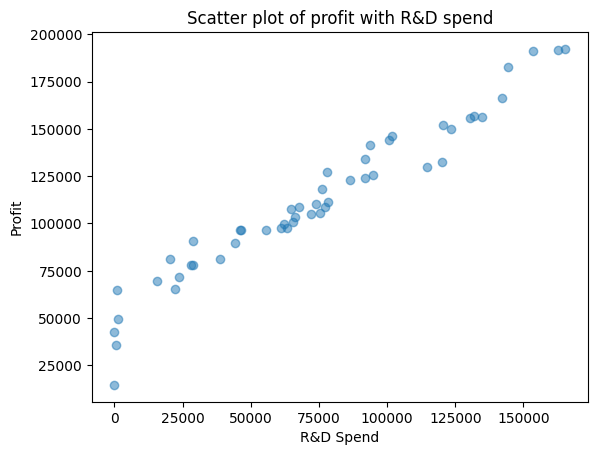

In [14]:
plt.scatter(df['R&D Spend'], df['Profit'], alpha = 0.5)
plt.title("Scatter plot of profit with R&D spend")
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


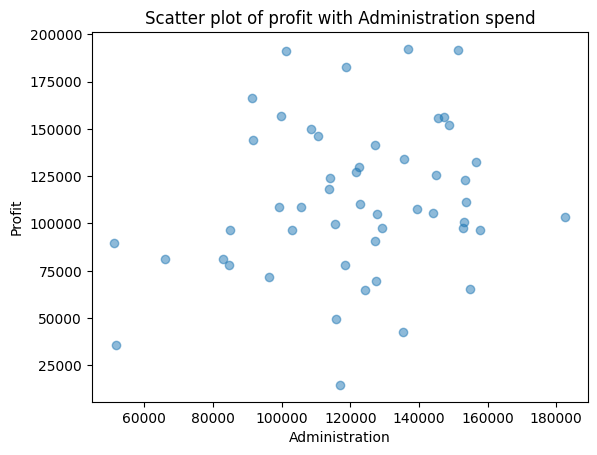

In [15]:
plt.scatter(df['Administration'], df['Profit'], alpha = 0.5)
plt.title("Scatter plot of profit with Administration spend")
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

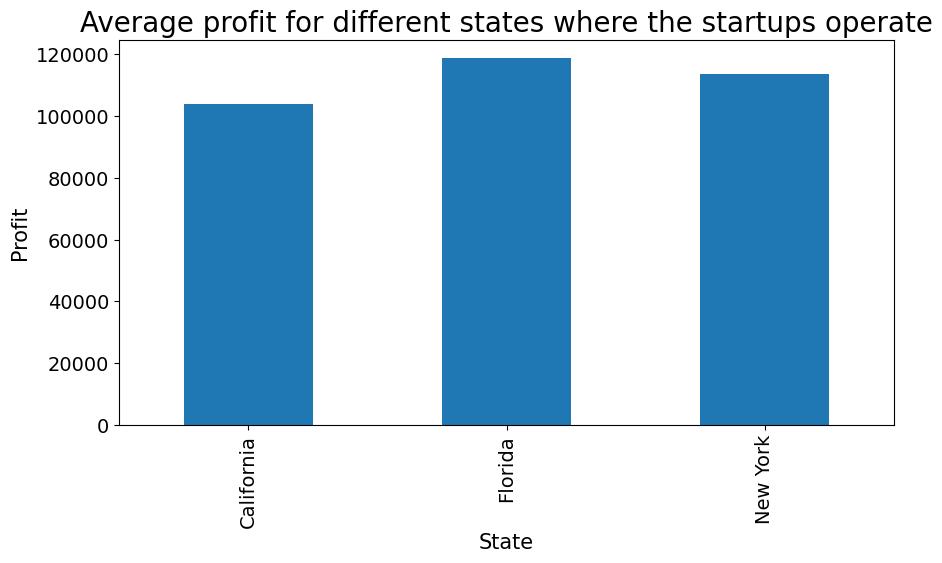

In [17]:
# Create the figure object
ax = df.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [18]:
df.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [19]:
# Create dummy variables for the catgeorical variable State
df['NewYork_State'] = np.where(df['State']=='New York', 1, 0)
df['California_State'] = np.where(df['State']=='California', 1, 0)
df['Florida_State'] = np.where(df['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
df.drop(columns=['State'],axis=1,inplace=True)

In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [21]:
dependent_variable = 'Profit'

In [22]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [23]:
independent_variables

['R&D Spend',
 'NewYork_State',
 'Administration',
 'Florida_State',
 'California_State',
 'Marketing Spend']

In [25]:
# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

In [26]:
df[independent_variables]

,R&D Spend,NewYork_State,Administration,Florida_State,California_State,Marketing Spend
0,165349.20,1,136897.80,0,0,471784.10
1,162597.70,0,151377.59,0,1,443898.53
2,153441.51,0,101145.55,1,0,407934.54
3,144372.41,1,118671.85,0,0,383199.62
4,142107.34,0,91391.77,1,0,366168.42
5,131876.90,1,99814.71,0,0,362861.36
6,134615.46,0,147198.87,0,1,127716.82
7,130298.13,0,145530.06,1,0,323876.68
8,120542.52,1,148718.95,0,0,311613.29
9,123334.88,0,108679.17,0,1,304981.62


In [27]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
X_train[0:10]

array([[5.5493950e+04, 0.0000000e+00, 1.0305749e+05, 1.0000000e+00,
        0.0000000e+00, 2.1463481e+05],
       [4.6014020e+04, 1.0000000e+00, 8.5047440e+04, 0.0000000e+00,
        0.0000000e+00, 2.0551764e+05],
       [7.5328870e+04, 0.0000000e+00, 1.4413598e+05, 1.0000000e+00,
        0.0000000e+00, 1.3405007e+05],
       [4.6426070e+04, 0.0000000e+00, 1.5769392e+05, 0.0000000e+00,
        1.0000000e+00, 2.1079767e+05],
       [9.1749160e+04, 0.0000000e+00, 1.1417579e+05, 1.0000000e+00,
        0.0000000e+00, 2.9491957e+05],
       [1.3029813e+05, 0.0000000e+00, 1.4553006e+05, 1.0000000e+00,
        0.0000000e+00, 3.2387668e+05],
       [1.1994324e+05, 0.0000000e+00, 1.5654742e+05, 1.0000000e+00,
        0.0000000e+00, 2.5651292e+05],
       [1.0002300e+03, 1.0000000e+00, 1.2415304e+05, 0.0000000e+00,
        0.0000000e+00, 1.9039300e+03],
       [5.4205000e+02, 1.0000000e+00, 5.1743150e+04, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.5605480e+04, 1.0000000e+00,

In [29]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train[0:10]

array([[0.33561668, 0.        , 0.48655174, 1.        , 0.        ,
        0.45494286],
       [0.2782839 , 1.        , 0.3173015 , 0.        , 0.        ,
        0.43561799],
       [0.45557444, 0.        , 0.87258866, 1.        , 0.        ,
        0.28413435],
       [0.2807759 , 0.        , 1.        , 0.        , 1.        ,
        0.44680961],
       [0.55488118, 0.        , 0.59103645, 1.        , 0.        ,
        0.62511553],
       [0.7880179 , 0.        , 0.88568959, 1.        , 0.        ,
        0.68649342],
       [0.72539353, 0.        , 0.98922572, 1.        , 0.        ,
        0.54370828],
       [0.0060492 , 1.        , 0.6847981 , 0.        , 0.        ,
        0.0040356 ],
       [0.00327821, 1.        , 0.00432296, 0.        , 0.        ,
        0.        ],
       [0.39676926, 1.        , 0.95618996, 0.        , 0.        ,
        0.22709197]])

In [31]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [32]:
regressor.intercept_

np.float64(44153.9546678486)

In [33]:
regressor.coef_

array([ 1.27892182e+05,  7.86007422e+02,  3.49927567e+03, -8.72645791e+02,
        8.66383692e+01,  1.72720281e+04])

In [34]:
y_pred_train = regressor.predict(X_train)

In [35]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [36]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [38]:
#Predicted profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [39]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [40]:
mean_squared_error(y_test, y_pred)

83502864.03257746

In [41]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [42]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.99015279495

In [45]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [46]:
r2_score(y_test, y_pred)

0.9347068473282424